In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv')

In [10]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

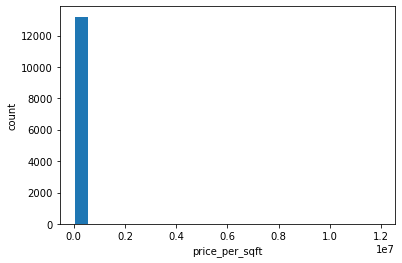

In [15]:
plt.hist(df.price_per_sqft, bins=20, rwidth= 0.8 )
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

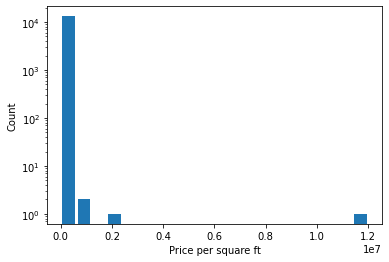

In [16]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [17]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [19]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
1005,other,1 BHK,15.0,1.0,30.0,1,200000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
7012,other,1 BHK,650.0,1.0,500.0,1,76923
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
798,other,4 Bedroom,10961.0,4.0,80.0,4,729


In [20]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [21]:
df.shape

(13200, 7)

In [22]:
df.shape[0] - df2.shape[0]

28

In [23]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [24]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8650,HAL 2nd Stage,4 Bedroom,2400.0,4.0,650.0,4,27083
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166
3665,Koramangala,4 Bedroom,2400.0,6.0,600.0,4,25000
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166
6285,Malleshwaram,4 Bedroom,3000.0,5.0,815.0,4,27166
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9873,other,3 Bedroom,2400.0,6.0,775.0,3,32291
6135,other,3 Bedroom,4273.0,3.0,1100.0,3,25743
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000


In [25]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [26]:
df2.shape[0]-df3.shape[0]

125

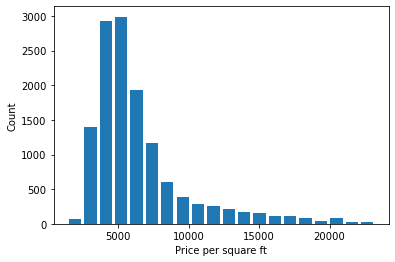

In [27]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

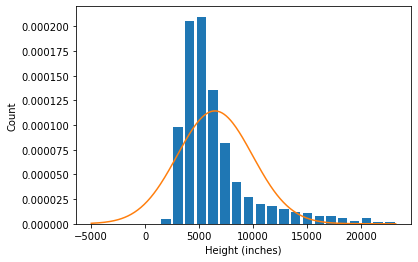

In [28]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [29]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\ANWESH~1\AppData\Local\Temp/ipykernel_20220/722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10668,Jalahalli,1 BHK,615.0,1.0,46.00,1,7479,0.196895
11893,other,3 BHK,2240.0,3.0,300.00,3,13392,1.624804
1178,Doddakallasandra,2 BHK,1233.0,2.0,43.00,2,3487,-0.767119
3158,Vittasandra,2 BHK,1259.0,2.0,67.40,2,5353,-0.316505
2860,Mahadevpura,1 BHK,730.0,1.0,35.00,1,4794,-0.451496
694,other,3 Bedroom,1092.0,2.0,98.50,3,9020,0.569025
6814,Marathahalli,3 BHK,1690.0,3.0,116.00,3,6863,0.048139
6771,other,5 Bedroom,1000.0,5.0,140.00,5,14000,1.771628
5565,Marathahalli,2 BHK,1102.0,2.0,53.67,2,4870,-0.433143
6840,Kanakapura,2 BHK,1130.0,2.0,45.20,2,4000,-0.643236


In [30]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [31]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333,4.025420
5974,other,4 Bedroom,2360.0,4.0,650.0,4,27542,5.041836
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291,6.188654
8157,other,4 BHK,2230.0,4.0,792.0,4,35515,6.967206
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619,9.890157


In [33]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [34]:
df2.shape[0] - df4.shape[0]

125